In [2]:
using PyPlot, Distributions, Interact;

In [35]:
Pkg.add( "RandomMatrices");

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of RandomMatrices
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [36]:
using RandomMatrices

INFO: Recompiling stale cache file /Users/edelman/.julia/lib/v0.4/Iterators.ji for module Iterators.


# We begin with the Marcenko-Pastur Law (notation follows course notes)

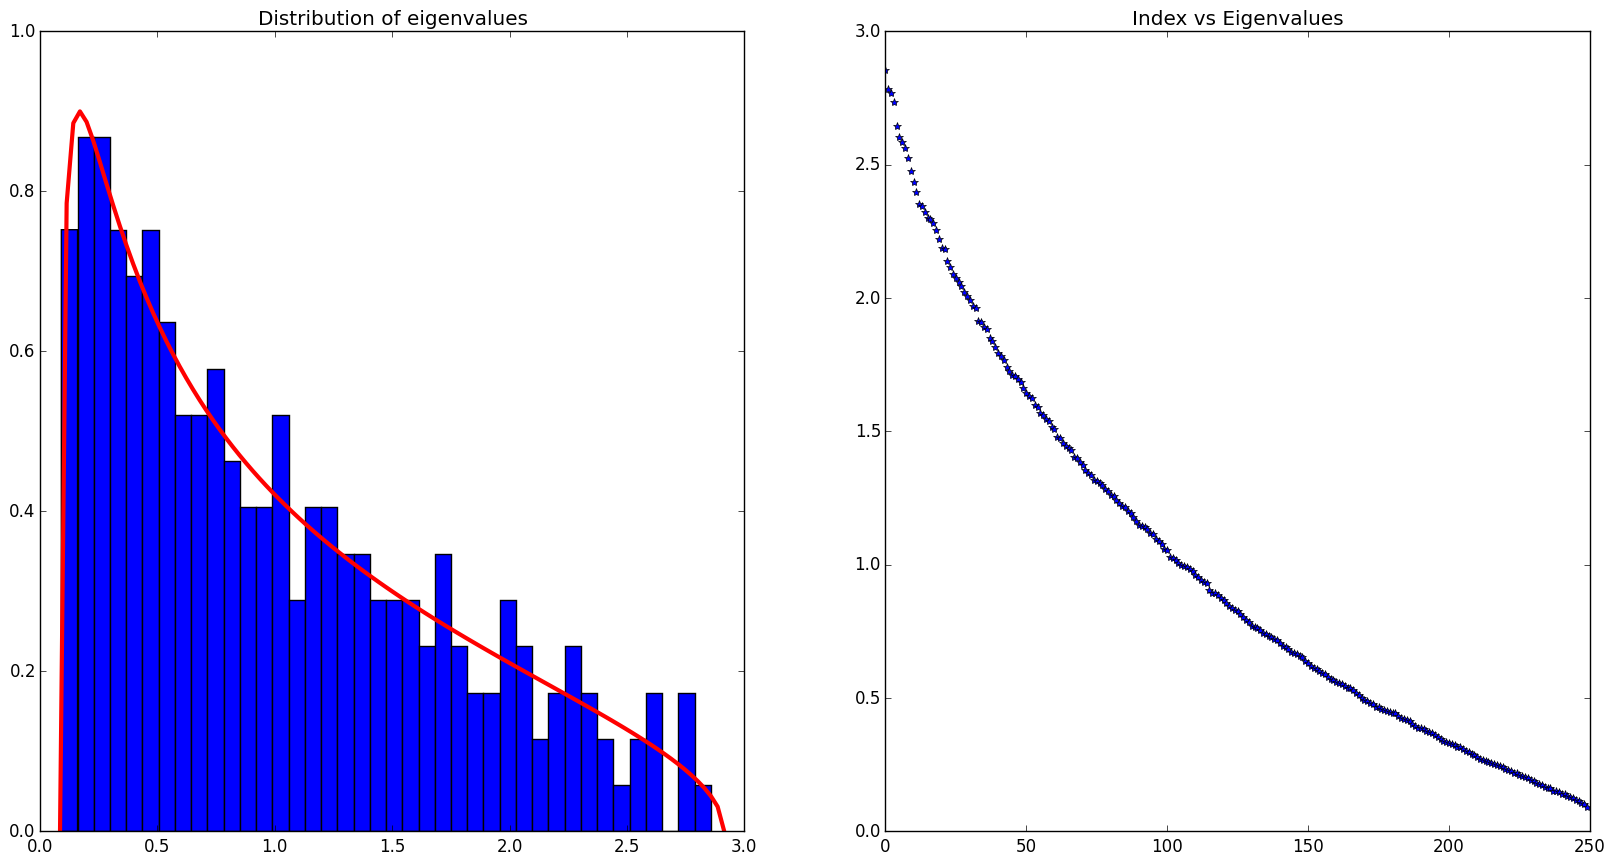

PyObject <matplotlib.text.Text object at 0x31e4a36a0>

In [31]:
m=500
n=250
r=n/m
e =svdvals(randn(m,n)).^2/m
a = (1-√r)^2
b = (1+√r)^2
x= a+ (b-a)*(0:.01:1)

figure(figsize=[20,10])
subplot(121)
plt[:hist](e,40,normed=true)
plot(x, √((x-a).*(b-x))./(2π*x*r),"r",linewidth=3)
title("Distribution of eigenvalues")
subplot(122)
plot(e,"*")
title("Index vs Eigenvalues")

## It's way faster to do bidiagonal models

In [62]:
function LaguerreBidiagonal(;m=200,n=100,β=1)
d = [rand(Chi(j*β)) for j=m:-1:(m-n+1)]
e= [rand(Chi(j*β)) for j=(n-1):-1:1]
Bidiagonal(d,e,false)
end


LaguerreBidiagonal (generic function with 4 methods)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"r",0.5,0.1:0.1:1.0)

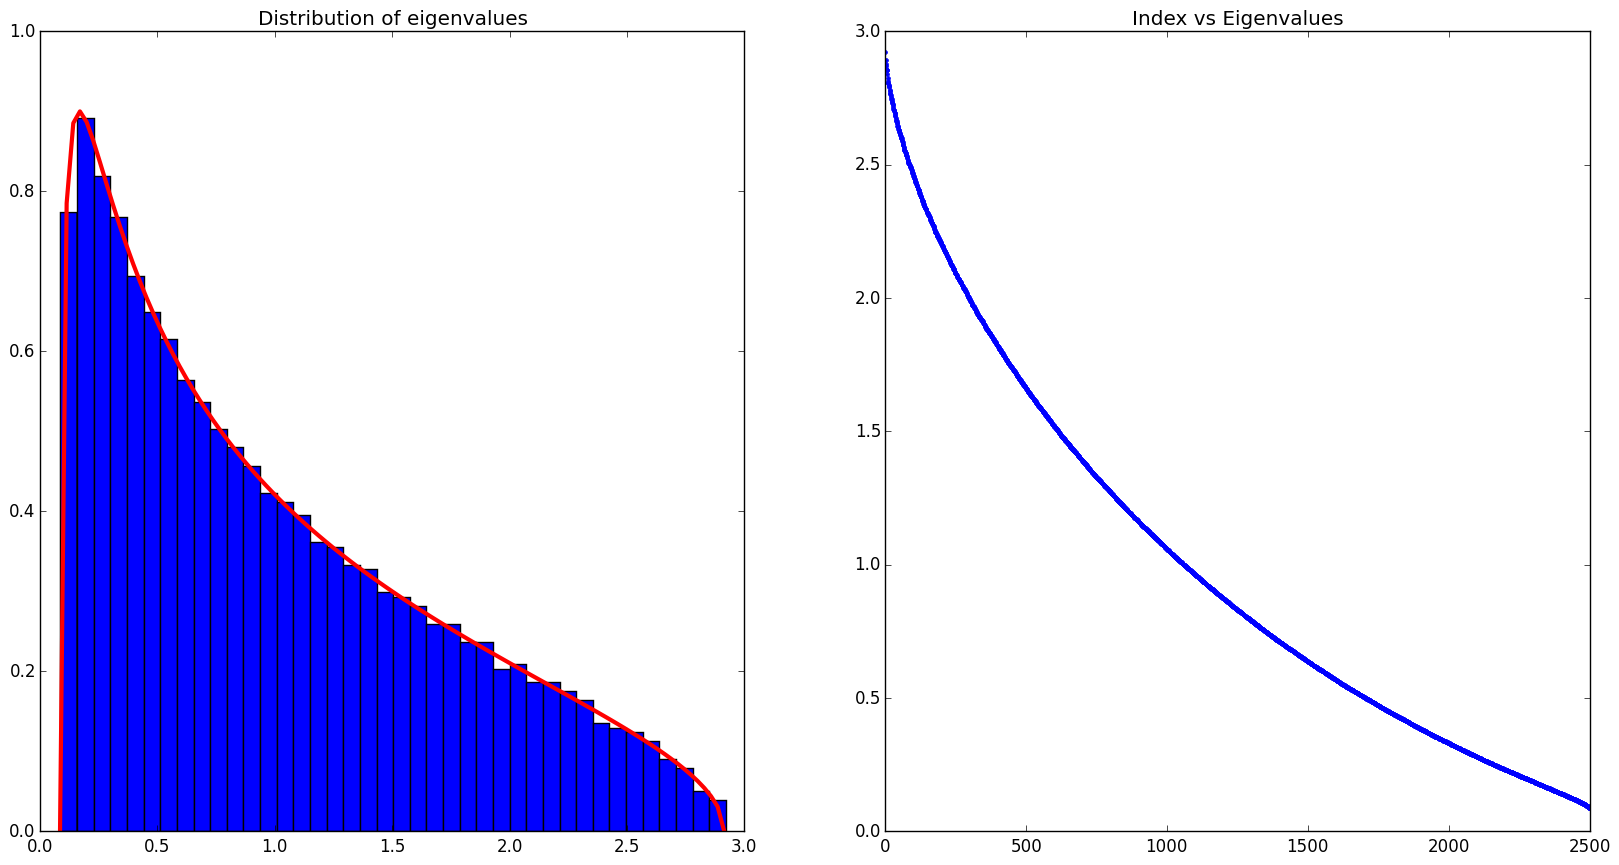

In [95]:
n = 2500
β = 1
f=figure(figsize=[20,10])
@manipulate for r=.1:.1:1; withfig(f) do
        m =round(n/r)
        e =svdvals(LaguerreBidiagonal(m=m,n=n,β=β)).^2/(m*β)
        a = (1-√r)^2
b = (1+√r)^2
x= a+ (b-a)*(0:.01:1)
subplot(121)
plt[:hist](e,40,normed=true)
plot(x, √((x-a).*(b-x))./(2π*x*r),"r",linewidth=3)
title("Distribution of eigenvalues")
subplot(122)
plot(e,".")
title("Index vs Eigenvalues")
    end
end

In [123]:
function SpikedModel(;m=200,n=100,β=1,spike=1.0)
    B= LaguerreBidiagonal(m=m,n=n,β=1)
    B.dv[1]*=√spike
    Bidiagonal(B.dv,B.ev,false)
end

SpikedModel (generic function with 1 method)

Interact.Slider{Int64}([Reactive.Input{Int64}] 2500,"n",2500,500:500:5000)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"r",0.5,0.1:0.1:1.0)

Interact.Slider{Float64}([Reactive.Input{Float64}] 7.5,"spike",7.5,1.0:0.1:14.0)

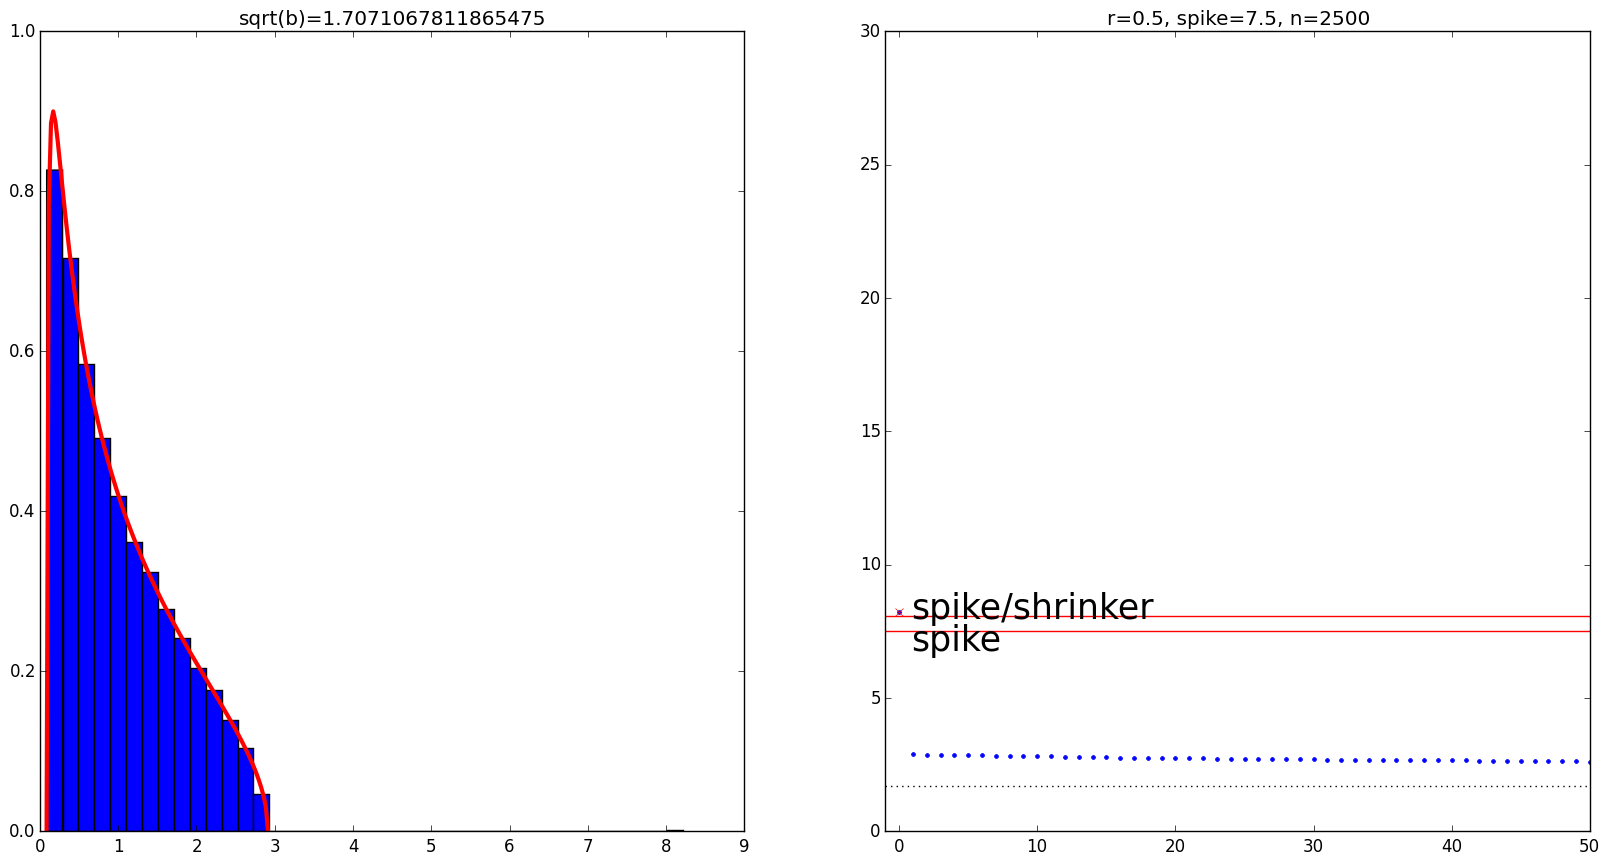

In [174]:


f=figure(figsize=[20,10])
@manipulate for n=500:500:5000, r=.1:.1:1, spike=1:.1:14;  withfig(f) do
        m =round(n/r)
        e =svdvals(SpikedModel(m=m,n=n,spike=spike)).^2/m
       a = (1-√r)^2
      b = (1+√r)^2
     x= a+ (b-a)*(0:.01:1)
subplot(121)
plt[:hist](e,40,normed=true)
plot(x, √((x-a).*(b-x))./(2π*x*r),"r",linewidth=3)
#title("Distribution of eigenvalues")
        title("sqrt(b)=$(√b)")
subplot(122)
        
plot(e,".")
        axis([-1,50,0,30])
        plot(e[1],"xr")
        plot([-1; 50],[1; 1]*spike,"r")
        shrinker = 1/(1+r/(spike-1))
        plot([-1; 50],[1; 1]*spike/shrinker,"r")
        plot([-1; 50],[1; 1]*√(b),"k:")
        text(1,spike-.7,"spike",fontsize=25)
        text(1,spike/shrinker-.1,"spike/shrinker",fontsize=25)
        title("r=$r, spike=$spike, n=$n")
    end
end

In [ ]:
B=Bidiagonal([1,2,3],[1,2])

In [6]:
Bidiagonal(1:3,1:2,true)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Bidiagonal{Int64}}, ::UnitRange{Int64}, ::UnitRange{Int64}, ::Bool)
This may have arisen from a call to the constructor Bidiagonal{Int64}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  Bidiagonal{#s332,T}(!Matched::Array{T,1}, !Matched::Array{T,1}, ::Bool)
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{T}, !Matched::T)
while loading In[6], in expression starting on line 1

In [15]:
function LaguerreBidiagonal(;m=2000,n=1000,β=1,cutoff=100)
    d = [rand(Chi(j*β)) for j=m:-1:(m-n+1+(n-cutoff-1))]
    e= [rand(Chi(j*β)) for j=(n-1):-1:n-cutoff]
Bidiagonal(d,e,false)
end

LaguerreBidiagonal (generic function with 1 method)

In [19]:
b=LaguerreBidiagonal()
v=[maximum(svdvals(b[k:end,k:end])) for k=1:size(b,1)]

101-element Array{Any,1}:
 76.0776
 76.0583
 76.0379
 76.0156
 75.9899
 75.9573
 75.9201
 75.8862
 75.8608
 75.8457
 75.8385
 75.8347
 75.8322
  ⋮     
 73.2438
 73.1385
 72.9622
 72.7154
 72.4419
 72.155 
 71.6751
 70.8983
 69.5331
 66.8779
 60.6102
 42.5924

In [20]:
using PyPlot

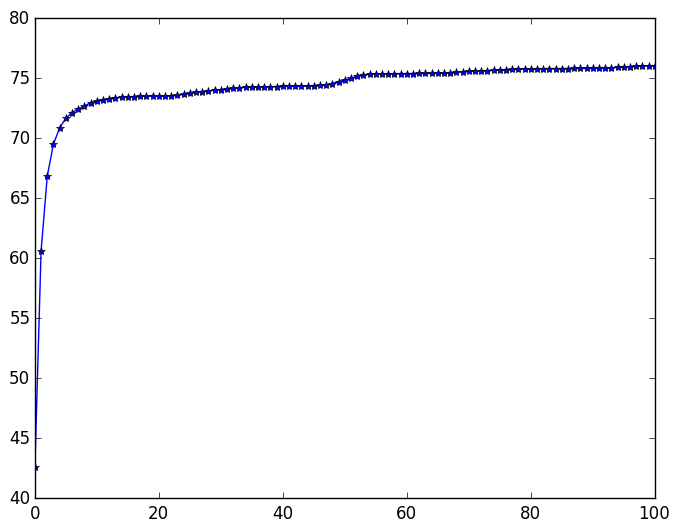

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a1b5470>

In [26]:
plot((flipdim(v,1)),"-*")

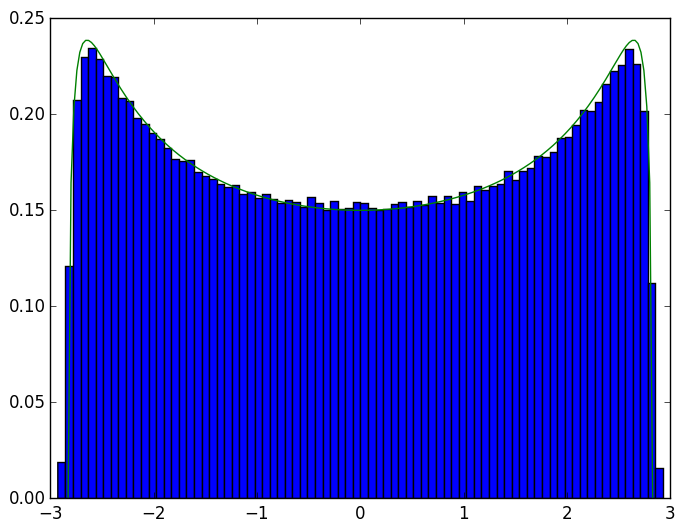

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320beb898>

In [56]:
n=200
t=1000
v=[];
for i=1:t
A=sign(randn(n))
B=sign(randn(n))
C=sign(randn(n))
Q1=full(qrfact(randn(n,n))[:Q])
Q2=full(qrfact(randn(n,n))[:Q])
e = eigvals(diagm(A)+ Q1*diagm(B)*Q1'+ Q2*diagm(C)*Q2')
    append!(v,e)
end
plt[:hist](v,80,normed=true)
z=(-1:.01:1)*√8
plot(z, -3*√abs(8.0-z.^2)./(z.^2-9)/(2π))

In [48]:
size(v)

(10000,)

In [66]:
@manipulate for c=0:.01:1
    n=100
    s=sqrt(1-c^2)
    Q = c* I + s*full(qrfact(randn(n,n))[:Q])
    sum(Q[:].^4)/n
end

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"c",0.5,0.0:0.01:1.0)

0.06659656294680864

In [58]:
using Interact

  likely near /Users/edelman/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/edelman/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/edelman/.julia/v0.4/IJulia/src/execute_request.jl: